## **Problem Statement:**

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\poovi\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv")
df.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
df.shape

(159571, 8)

In [4]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


We can drop id column as it does not contribute much in model building

In [6]:
df = df.drop(['id'],axis=1)

In [7]:
df['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [8]:
df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [9]:
df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [10]:
df['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [11]:
df['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [12]:
df['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [13]:
col = df.iloc[:,1:].sum()
col

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

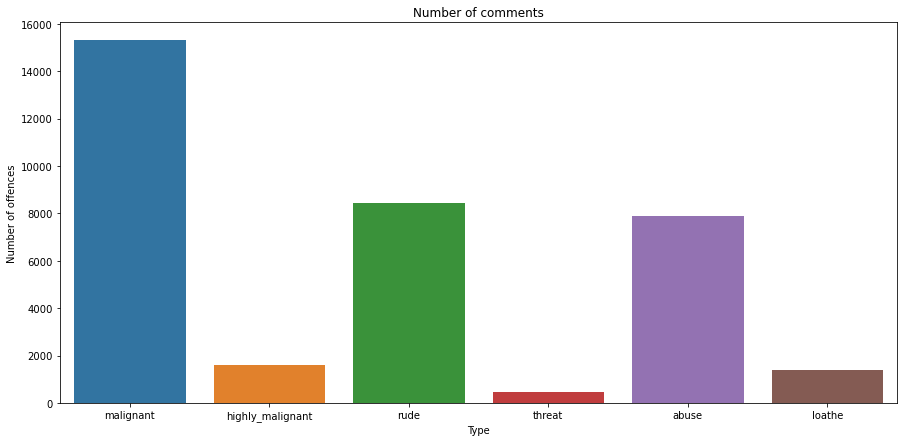

In [14]:
#visualization

plt.figure(figsize=(15,7))
ax = sns.barplot(col.index,col.values)

plt.title("Number of comments")
plt.ylabel("Number of offences")
plt.xlabel("Type")
plt.show()

Malignant comments are more compared to threat comments

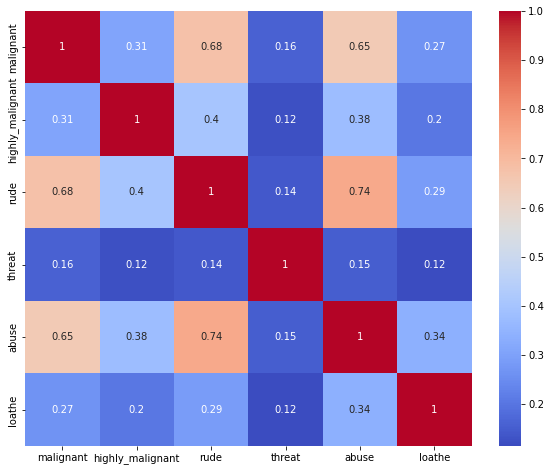

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")
plt.show()

In [16]:
df['label']=df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']].sum(axis=1)

In [17]:
df.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


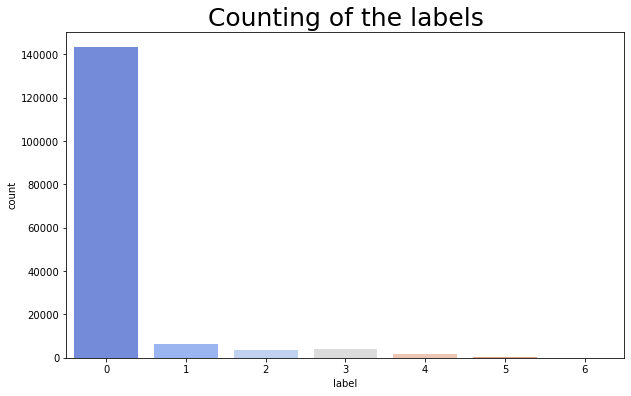

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [19]:
#converting all the lable as 0 and 1, 1 denotes for malignant Comments
df['label'] =( df['label'] >0).astype(int)
df.head(5)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [20]:
df['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [21]:
df['length'] = df['comment_text'].map(lambda comment_text:len(comment_text))

In [22]:
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,65
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1,44
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,115
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,472
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0,70


**Data Pre-processing**

In [23]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
#Replacing '\n' in comment_text
df['comment_text'] = df['comment_text'].replace('\n',' ')

#Function Definition for using regex operations and other text preprocessing for getting cleaned text
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [26]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df['comment_text'] = df['comment_text'].apply(clean_comments)
df['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [27]:
#Creating a column 'cleaned_length'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df['cleaned_length'] = df['comment_text'].map(lambda comment_text: len(comment_text))


In [28]:
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length,cleaned_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
5,congratulation well use tool well talk,0,0,0,0,0,0,0,65,38
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,0,115,57
8,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,0,472,277
9,alignment subject contrary dulithgow,0,0,0,0,0,0,0,70,36


In [29]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

In [30]:
df_mal = df.loc[:,['comment_text','malignant']]

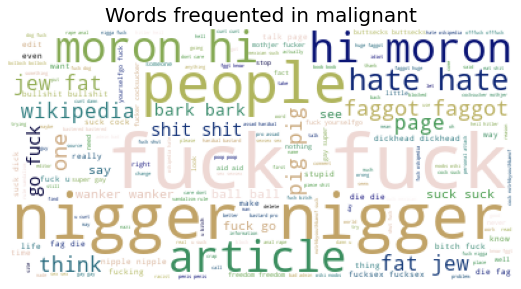

In [31]:
wordcloud(df_mal, 'malignant')

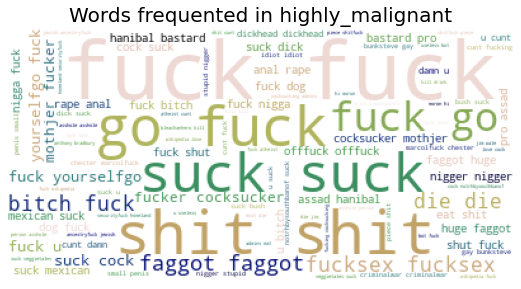

In [32]:
df_Hmal = df.loc[:,['comment_text','highly_malignant']]
wordcloud(df_Hmal, 'highly_malignant')

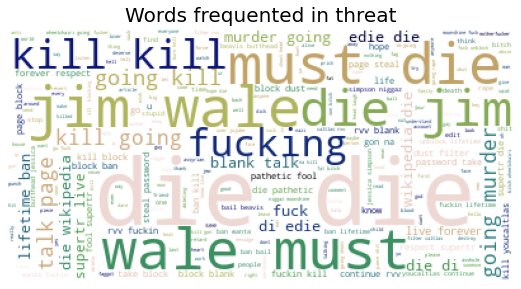

In [33]:
df_thr = df.loc[:,['comment_text','threat']]
wordcloud(df_thr, 'threat')

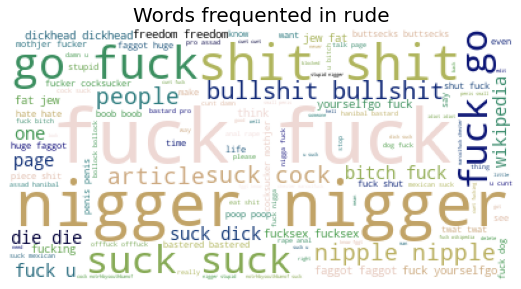

In [34]:
df_rud = df.loc[:,['comment_text','rude']]
wordcloud(df_rud, 'rude')

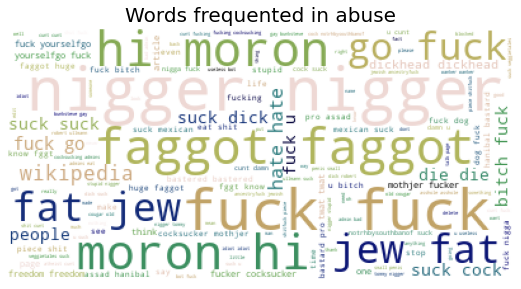

In [35]:
df_abe = df.loc[:,['comment_text','abuse']]
wordcloud(df_abe, 'abuse')

In [38]:
#converting features into number vectors

tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [39]:
x = tf_vec.fit_transform(df['comment_text'])
y = df['label']

# Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [44]:
acc = 0 

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = accuracy_score(y_test,y_pred)
    if temp>acc:
        acc=temp
        best_rstate = i
        
print("Accuracy : ",acc*100,"RandomState : ",best_rstate)

Accuracy :  95.84401526804534 RandomState :  88


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.22,random_state=i)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

In [47]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()

model = [lr,rfc,ada,gbr,dtc,etc]

In [48]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    print("Accuracy Score ",m," is ", accuracy_score(y_test,predm))
    print("Confusion Matrix is \n",confusion_matrix(y_test,predm))
    print("Classification report is \n",classification_report(y_test,predm))
    print("\n\n")

Accuracy Score  LogisticRegression()  is  0.9571868056742437
Confusion Matrix is 
 [[31399   165]
 [ 1338  2204]]
Classification report is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     31564
           1       0.93      0.62      0.75      3542

    accuracy                           0.96     35106
   macro avg       0.94      0.81      0.86     35106
weighted avg       0.96      0.96      0.95     35106




Accuracy Score  RandomForestClassifier()  is  0.9565601321711389
Confusion Matrix is 
 [[31184   380]
 [ 1145  2397]]
Classification report is 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     31564
           1       0.86      0.68      0.76      3542

    accuracy                           0.96     35106
   macro avg       0.91      0.83      0.87     35106
weighted avg       0.95      0.96      0.95     35106




Accuracy Score  AdaBoostClassifier()  is  0.9450236426

we have random forest classifier as 95.6%

# Cross Validation

In [49]:
mean = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ",m,"is", CV)
    print("Mean Score of ",m ,"is",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  LogisticRegression() is [0.95654081 0.95663345 0.95497274 0.95613211 0.95616344]
Mean Score of  LogisticRegression() is 0.95608850948918
Standard Deviation is  0.0005922834139307116


Score of  RandomForestClassifier() is [0.95766881 0.95694679 0.95650812 0.95738547 0.95578743]
Mean Score of  RandomForestClassifier() is 0.95685932400321
Standard Deviation is  0.0006651398634738571


Score of  AdaBoostClassifier() is [0.94551151 0.94560381 0.94510246 0.94782854 0.94554114]
Mean Score of  AdaBoostClassifier() is 0.9459174938176664
Standard Deviation is  0.0009717228970087621


Score of  GradientBoostingClassifier() is [0.9403102  0.940653   0.94033966 0.94146769 0.93877295]
Mean Score of  GradientBoostingClassifier() is 0.9403087026997621
Standard Deviation is  0.0008742191829335018


Score of  DecisionTreeClassifier() is [0.94131286 0.94021433 0.94124835 0.94102902 0.93986965]
Mean Score of  DecisionTreeClassifier() is 0.9407348416816301
Standard Deviation is  0.00058375263518

we have random forest classifier with 95.6% accuracy

# HyperTuning

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[20,50,100],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2']}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [51]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [52]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 50, 100]}])

In [53]:
rf_random.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

In [54]:
rf_random.best_score_

0.9561161772385811

In [55]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

In [56]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
predy = rfc.predict(x_test)
predy

array([0, 1, 1, ..., 0, 0, 1])

In [58]:
classifier_final_model = rf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test)

# AUC ROC

In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_proba = rfc.predict_proba(x_test)[:,-1]


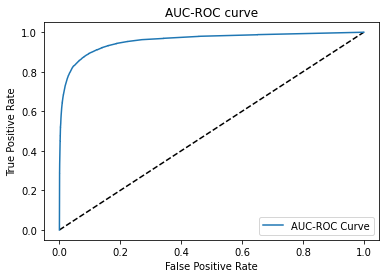

In [61]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC-ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC curve")
plt.legend(loc="lower right")
plt.show()

In [75]:
import joblib
joblib.dump(rf_random,"Malignant_comments_Project.obj")

['Malignant_comments_Project.obj']

# Loading test dataset

In [76]:
df1 = pd.read_csv(r"C:\Users\poovi\Downloads\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv")
df1

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [77]:
df1.drop('id',axis=1,inplace=True)
df1['comment_text'] = df1['comment_text'].apply(clean_comments)
df1['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [78]:
X_test = tf_vec.fit_transform(df1['comment_text'])

In [79]:
Malignant_classifier= joblib.load('Malignant_comments_Project.obj')
predi= Malignant_classifier.predict(X_test)

In [80]:
Predicted = pd.DataFrame({"Malignant_classifier":predi})
Predicted.head(10)

,Malignant_classifier
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [81]:
Predicted.value_counts()

Malignant_classifier
0                       148013
1                         5151
dtype: int64

In [82]:
Predicted

,Malignant_classifier
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0
